# Projet 2 - Nettoyage & Analyse exploratoire
## Objectifs:
- Valider la qualité du dataset (beaucoup de données manquantes, dupliquées?)
- Décrire les informations du dataset (nombre de colonnes, lignes)
- Sélectionner les variables pertinentes
- Déterminer les ordres de grandeur des indicateurs statistiques

In [55]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# Version des modules
print(np.__version__)
print(matplotlib.__version__)
print(pd.__version__)

1.18.5
3.2.2
1.0.5


In [56]:
# Importer le dataset
EdCountry = pd.read_csv('EdStatsCountry.csv')              # infos sur sources des données
EdCountrySeries = pd.read_csv('EdStatsCountry-Series.csv') # correspondance sources séries country
EdData = pd.read_csv('EdStatsData.csv')                    # stats éducation par pays et par année
EdFootNote = pd.read_csv('EdStatsFootNote.csv')            # correspondance code pays/code séries/année/description
EdSeries = pd.read_csv('EdStatsSeries.csv')                # définitions séries/sources/commentaires...

### Exploration du jeu de données

Pour avoir une idée de ce que comporte chacun des dataframes on peut utiliser la méthode *head()* qui en affiche les premières lignes.

In [57]:
pd.set_option('display.max_columns', None)  # option permettant d'afficher toutes les colonnes
EdData.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,60.999962,61.922680,62.693420,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.041870,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.811760,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,50.046188,51.245281,52.242321,54.754372,56.486790,57.314659,58.226051,59.289230,60.748180,61.520870,62.734951,64.115883,65.099663,65.129204,65.827492,66.797028,63.260429,63.972111,67.033043,65.761559,68.780800,69.267052,70.435387,72.047287,73.275620,75.132980,76.641022,77.653580,78.485397,79.475769,79.608330,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,0.699950,0.710140,0.718430,0.743740,0.759440,0.769250,0.779860,0.790710,0.799610,0.806770,0.816060,0.825130,0.834190,0.834760,0.844660,0.854320,0.826490,0.834080,0.859090,0.847310,0.872660,0.872690,0.884940,0.897370,0.904060,0.912750,0.919790,0.926300,0.927680,0.930840,0.929620,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,71.499512,72.162064,72.717690,73.619972,74.379982,74.507133,74.662628,74.981827,75.972542,76.255493,76.875053,77.703857,78.039368,78.021889,77.933853,78.187492,76.541100,76.697418,78.028130,77.611900,78.817490,79.372040,79.593536,80.287529,81.051369,82.315048,83.324059,83.832

Cela nous permet de constater que le fichier *EdStatsData.csv* contient les données chiffrées (par pays et indicateur en ligne, et par année en colonne) tandis que les autres fichiers regroupent seulement des métadonnées (pas affichés ici car peu d'intérêt). 

Le fichier *EdStatsSeries.csv* nous sera toutefois utile car il contient la définition des indicateurs statistiques.

### Description du jeu de données
#### Nombre de lignes et colonnes

In [59]:
print(EdCountry.shape)
print(EdCountrySeries.shape)
print(EdData.shape)
print(EdFootNote.shape)
print(EdSeries.shape)

(241, 32)
(613, 4)
(886930, 70)
(643638, 5)
(3665, 21)


In [60]:
EdData.describe(include = "all")

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,886930,886930,886930,886930,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,8.912200e+04,3.877700e+04,3.751100e+04,3.846000e+04,3.860600e+04,9.029600e+04,3.937200e+04,3.864100e+04,3.855200e+04,3.754000e+04,1.244050e+05,7.443700e+04,7.554300e+04,7.579300e+04,7.746200e+04,1.313610e+05,7.680700e+04,7.345300e+04,8.491400e+04,1.188390e+05,1.766760e+05,1.235090e+05,1.242050e+05,1.303630e+05,1.288140e+05,1.841080e+05,1.403120e+05,1.372720e+05,1.343870e+05,1.421080e+05,2.424420e+05,1.460120e+05,1.472640e+05,1.375090e+05,1.137890e+05,1.310580e+05,1.646000e+04,143.000000,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
unique,242,242,3665,3665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,St. Martin (French part),VEN,"Repeaters in Grade 2 of primary education, bot...",LO.EGRA.CLPM.FLF.2GRD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3665,3665,242,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,3.283898e+09,7.664969e+09,7.913722e+09,7.856908e+09,8.118002e+09,3.622763e+09,9.156550e+09,1.014901e+10,1.104709e+10,1.195436e+10,9.084424e+09,1.571674e+10,1.604668e+10,1.643532e+10,1.684022e+10,1.052543e+10,1.874630e+10,2.027385e+10,1.794678e+10,1.331558e+10,9.423384e+09,1.384867e+10,1.428299e+10,1.449393e+10,1.589729e+10,1.188637e+10,1.684674e+10,1.872300e+10,2.029794e+10,1.894907e+10,1.189592e+10,2.117911e+10,2.176323e+10,2.425332e+10,2.678449e+10,2.353720e+10,1.934411e+11,2.160839,5.780697e+02,6.054774e+02,6.315916e+02,6.556516e+02,6.751516e+02,6.911287e+02,7.040640e+02,7.145788e+02,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,NaN,NaN,NaN,NaN,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,1.780774e+11,2.744142e+11,2.790549e+11,2.823809e+11,2.940635e+11,2.002929e+11,3.264675e+11,3.535351e+11,3.804257e+11,4.014873e+11,3.665667e+11,4.881357e+11,5.012055e+11,5.121962e+11,5.292982e+11,4.285218e+11,5.812586e+11,6.142357e+11,5.859148e+11,5.153472e+11,4.442374e+11,5.449242e+11,5.622886e+11,5.803607e+11,6.278337e+11,5.576181e+11,6.851484e+11,7.465688e+11,7.944132e+11,7.623650e+11,6.218710e+11,8.555853e+11,8.833955e+11,9.513016e+11,1.023180e+12,9.732465e+11,2.839188e+12,0.810584,1.475072e+04,1.577305e+04,1.678556e+04,1.778666e+04,1.874408e+04,1.965409e+04,2.052941e+04,2.136851e+04,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,NaN,NaN,NaN,NaN,-1.435564e+00,-1.594625e+00

La ligne *unique* nous indique que 242 pays sont référencés pour 3665 indicateurs différents.

Les lignes suivantes sont peu pertinentes car elles regroupent plusieurs indicateurs différents.

Vérifions la présence de doublons dans le dataframe en agrégeant les colonnes *Country Name* et *Indicator Name*.

In [61]:
gb = EdData.groupby('Country Name')['Indicator Name']
doublons = gb.count() - gb.nunique()    # différence entre le nombre d'indicateurs par pays et le nombre d'indicateurs n'apparaissant qu'une fois par pays
doublons.sum()                          # somme sur toute la colonne, donne le nombre total de doublons

0

Le dataframe ne contient pas de doublon.

In [62]:
info = EdData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

Les données sont bien dans un format numérique.

- Les données à partir de l'année 2020 sont prospectives et relativement peu complètes. 
- La colonne 2017 est quasiment vide.
- Les données trop anciennes nous intéressent peu.

Dans la suite on se propose de ne garder que les colonnes 2010 à 2016.

#### Sélection des variables d'intérêt

Le dataframe *EdData* contient un grand nombre de données (près de 900k lignes pour 70 colonnes). Avant d'en décrire la qualité il serait donc pertinent de ne garder que les variables d'intérêt.

La définition des indicateurs se trouve dans le fichier *EdStatsSeries.csv*. La lecture de ce fichier nous permet de sélectionner les variables qui présentent un intérêt dans le cadre d'un développement commercial à l'international:

- population inscrite au secondaire: **"Enrolment in secondary education, both sexes (number)"**
- population inscrite au tertiaire:  **"Enrolment in tertiary education, all programmes, both sexes (number)"**
- accès internet:                    **"Internet users (per 100 people)"**
- accès à un PC:                     **"Personal computers (per 100 people)"**
- PIB par habitant:                  **"GDP per capita (current US$)"**

In [63]:
# Les variables que l'on veut garder
variables = ["Personal computers (per 100 people)", 
             "Internet users (per 100 people)", 
             "Enrolment in secondary education, both sexes (number)", 
             "Enrolment in tertiary education, all programmes, both sexes (number)", 
             "GDP per capita (current US$)"]

In [64]:
# Premier tri sur les colonnes du dataset    
df_year = EdData[['Country Name', 'Indicator Name', '2010', '2011', '2012', '2013', '2014', '2015', '2016']]
df_year = df_year.dropna(thresh=3) #garde les lignes qui ont au moins 3 valeurs non manquantes (soit au moins une donnée renseignée)


In [65]:
# On trie ensuite sur les variables d'intérêt
df_year = df_year[df_year['Indicator Name'].isin(variables)]
    
df_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1191 to 884640
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    864 non-null    object 
 1   Indicator Name  864 non-null    object 
 2   2010            796 non-null    float64
 3   2011            805 non-null    float64
 4   2012            792 non-null    float64
 5   2013            773 non-null    float64
 6   2014            757 non-null    float64
 7   2015            686 non-null    float64
 8   2016            449 non-null    float64
dtypes: float64(7), object(2)
memory usage: 67.5+ KB


### Traitement des données manquantes
Selon les indicateurs, certaines années ne sont pas renseignées. On choisit ici de les remplir avec les données de la colonne précédente, ce qui nous permet d'avoir la colonne 2016 entièrement remplie et de ne garder que celle-ci pour comparer les pays entre eux.

In [66]:
df = df_year.copy()

# Remplissage des données manquantes avec la valeur de l'année précédente
df.loc[:, '2010':'2016']=df.loc[:, '2010':'2016'].fillna(method='pad', axis=1)

# Suppression des colonnes inutiles
df = df.drop(columns=['2010','2011', '2012', '2013', '2014', '2015'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1191 to 884640
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    864 non-null    object 
 1   Indicator Name  864 non-null    object 
 2   2016            864 non-null    float64
dtypes: float64(1), object(2)
memory usage: 27.0+ KB


Une organisation du dataframe avec les variables en colonne est plus lisible:

In [68]:
df = df.pivot(index='Country Name', columns='Indicator Name', values='2016')
df

Indicator Name,"Enrolment in secondary education, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)",GDP per capita (current US$),Internet users (per 100 people)
Country Name,,,,
Afghanistan,2698816.0,262874.0,561.778746,10.595726
Albania,315079.0,160527.0,4124.982390,66.363445
Algeria,4572513.0,1289474.0,3916.881571,42.945527
American Samoa,NaN,NaN,11834.745229,NaN
Andorra,4395.0,501.0,36988.622030,97.930637
...,...,...,...,...
West Bank and Gaza,721414.0,221018.0,2943.404534,61.178385
World,579206656.0,212670016.0,10191.309818,45.910282
"Yemen, Rep.",1768102.0,267498.0,990.334774,24.579208


Cette opération fait apparaître que certains pays ont des variables non renseignées sur les années 2010 à 2016. Nous les supprimons car il s'agit de pays à faible potentiel.

On note que la variable **"Personal computers (per 100 people)"** que nous avions sélectionné n'apparaît pas car elle n'est jamais renseignée sur l'intervalle de temps choisi.

In [69]:
df_indicateur = df.dropna().copy()

# On renomme les colonnes pour plus de clarté
df_indicateur.columns = ['Secondary population', 'Tertiary population', 'GDP per capita (current US$)', 'Internet users (%)']

Une variable plus intéressante que les variables *'Secondary population'* et *'Tertiary population'* serait simplement la somme des deux:

In [70]:
df_indicateur['Total secondary & tertiary'] = df_indicateur['Secondary population'] + df_indicateur['Tertiary population']
df_indicateur = df_indicateur.sort_values(by=['Total secondary & tertiary'], ascending = False)

In [71]:
df_indicateur

,Secondary population,Tertiary population,GDP per capita (current US$),Internet users (%),Total secondary & tertiary
Country Name,,,,,
World,579206656.0,212670016.0,10191.309818,45.910282,791876672.0
Low & middle income,477174112.0,153720352.0,4366.429509,38.978628,630894464.0
Middle income,453920000.0,154710016.0,4809.202575,41.926199,608630016.0
Lower middle income,252802720.0,61647864.0,2078.835481,29.852319,314450584.0
Upper middle income,201117296.0,93062144.0,7994.022621,55.695408,294179440.0
...,...,...,...,...,...
Marshall Islands,5454.0,1330.0,3665.207477,29.787779,6784.0
Bermuda,4040.0,973.0,85748.065414,98.000000,5013.0
Andorra,4395.0,501.0,36988.622030,97.930637,4896.0


Un tri sur la population totale d'étudiants fait rapidement ressortir les aggrégats de pays, que l'on peut traiter à part. On sépare le dataframe en un df "région" et un autre "pays". On les trie sur la variable **Total secondary & tertiary** qui représente le potentiel de clients total.

In [72]:
region = ["East Asia & Pacific","South Asia","Europe & Central Asia","Latin America & Caribbean","North America","Sub-Saharan Africa", "Middle East & North Africa", "Australia"]
df_region = df_indicateur.loc[region, :].sort_values(by=['Total secondary & tertiary'], ascending = False)
df_region

,Secondary population,Tertiary population,GDP per capita (current US$),Internet users (%),Total secondary & tertiary
Country Name,,,,,
East Asia & Pacific,154212112.0,69097800.0,9787.775545,52.796321,223309912.0
South Asia,153192192.0,33412020.0,1637.515774,26.466113,186604212.0
Europe & Central Asia,78143392.0,37693412.0,22230.203651,73.914751,115836804.0
Latin America & Caribbean,64141980.0,24087544.0,8311.370178,56.373113,88229524.0
Sub-Saharan Africa,56136952.0,7795920.5,1464.124539,19.998498,63932872.5
Middle East & North Africa,35294308.0,14332233.0,7200.935364,47.621417,49626541.0
North America,26895984.0,21096660.0,56081.944482,77.540410,47992644.0
Australia,2371284.0,1453521.0,49927.819509,88.238658,3824805.0


In [73]:
not_country = ["World", "Low & middle income","Middle income","Lower middle income","Upper middle income","East Asia & Pacific (excluding high income)","OECD members","High income", "Latin America & Caribbean (excluding high income)","Sub-Saharan Africa (excluding high income)","Least developed countries: UN classification","European Union","Heavily indebted poor countries (HIPC)","Europe & Central Asia (excluding high income)","Low income","Arab World","Middle East & North Africa (excluding high income)","Euro area", "East Asia & Pacific","South Asia","Europe & Central Asia","Latin America & Caribbean","North America","Sub-Saharan Africa", "Middle East & North Africa"]
df_country = df_indicateur.drop(not_country)
df_country

,Secondary population,Tertiary population,GDP per capita (current US$),Internet users (%),Total secondary & tertiary
Country Name,,,,,
India,129542056.0,32107420.0,1709.591808,29.547163,161649476.0
China,86127200.0,43367392.0,8123.180873,53.200000,129494592.0
United States,24229776.0,19531728.0,57638.159088,76.176737,43761504.0
Brazil,23501784.0,8285475.0,8649.948492,59.682747,31787259.0
Indonesia,23756316.0,5107999.0,3570.294888,25.366301,28864315.0
...,...,...,...,...,...
Marshall Islands,5454.0,1330.0,3665.207477,29.787779,6784.0
Bermuda,4040.0,973.0,85748.065414,98.000000,5013.0
Andorra,4395.0,501.0,36988.622030,97.930637,4896.0


 
On peut tracer nos variables d'intérêt par région:
 

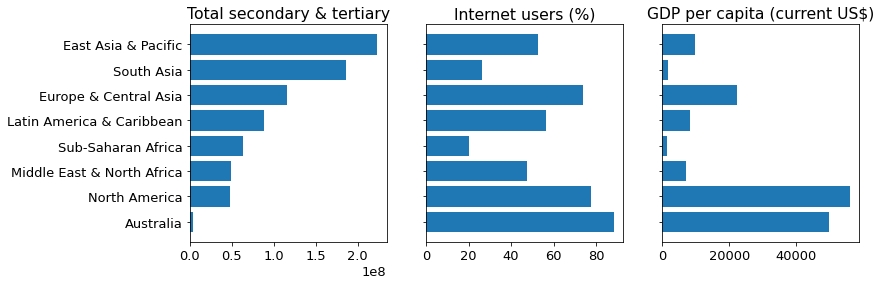

In [74]:
plt.rcParams.update({'font.size': 13})
fig, axes = plt.subplots(1,3, sharey=True, figsize=(12,4))

x = df_region.index

for i, value in enumerate(['Total secondary & tertiary', 'Internet users (%)', 'GDP per capita (current US$)']):
    y = df_region[value]
    axes[i].barh(x, y)
    axes[i].set_title(value)

axes[0].invert_yaxis()

### Critères de sélection
On peut fixer des seuils sur lesquels sélectionner les pays les plus favorables à un développement commercial:

In [75]:
n = 10               # nombre de pays à afficher
seuil_internet = 50  # seuil limite accès internet
seuil_GDP = 15000    # seuil limite PIB par habitant

df_seuil = df_country[df_country['Internet users (%)' ]>seuil_internet]
df_seuil = df_seuil[df_seuil['GDP per capita (current US$)' ]>seuil_GDP]
df_seuil.head(n)

,Secondary population,Tertiary population,GDP per capita (current US$),Internet users (%),Total secondary & tertiary
Country Name,,,,,
United States,24229776.0,19531728.00,57638.159088,76.176737,43761504.00
Japan,7227485.0,3862460.00,38900.569306,92.000000,11089945.00
Germany,7112949.5,2977781.00,42069.597987,89.647101,10090730.50
United Kingdom,6556991.5,2352932.75,40341.408246,94.775801,8909924.25
France,5947212.0,2388880.00,36854.968280,85.622200,8336092.00
"Korea, Rep.",3396766.0,3268099.00,27538.806128,92.716545,6664865.00
Italy,4606017.0,1826477.00,30674.836069,61.324253,6432494.00
Spain,3313127.0,1963924.00,26639.740588,80.561333,5277051.00
Saudi Arabia,3419441.0,1527769.00,20028.648207,73.750904,4947210.00


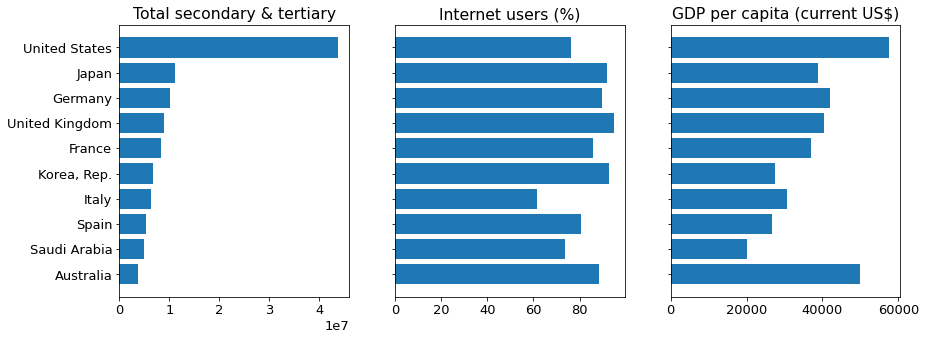

In [76]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(14,5))

pays_selec = df_seuil.head(n).index

for i, value in enumerate(['Total secondary & tertiary', 'Internet users (%)', 'GDP per capita (current US$)']):
    y = df_seuil[value].head(n)
    axes[i].barh(pays_selec, y)
    axes[i].set_title(value)

axes[0].invert_yaxis()

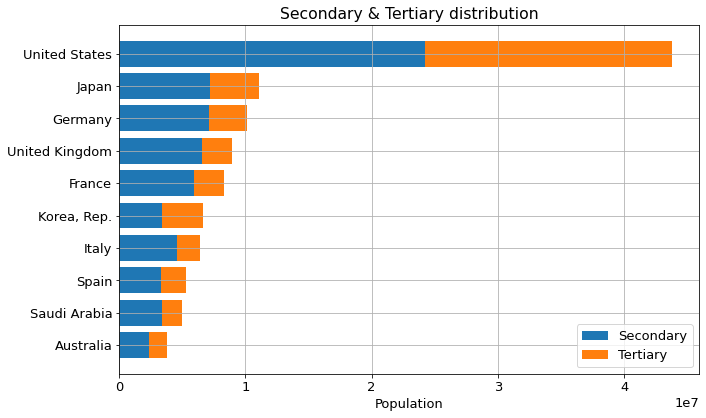

In [77]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
y1 = df_seuil['Secondary population'].head(n)
y2 = df_seuil['Tertiary population'].head(n)
ax.barh(pays_selec, y1, align='center',  label='Secondary')
ax.barh(pays_selec, y2, align='center', left=y1, label='Tertiary')
ax.set_yticks(pays_selec)
ax.set_xlabel('Population')
ax.set_title('Secondary & Tertiary distribution')
ax.grid(True)
ax.invert_yaxis()
ax.legend()
plt.tight_layout()
plt.show()

### Evolution des indicateurs
On se propose de regarder l'évolution des indicateurs choisis sur les dernières années pour les pays sélectionnés.

In [78]:
df_time = df_year[df_year["Country Name"].isin(pays_selec)].set_index(["Country Name", "Indicator Name"]).transpose()
df_time

Country Name                                               Australia  \
Indicator Name Enrolment in secondary education, both sexes (number)   
2010                                                    2282421.0      
2011                                                    2328350.0      
2012                                                    2377328.0      
2013                                                    2384025.0      
2014                                                    2371284.0      
2015                                                          NaN      
2016                                                          NaN      

Country Name                                                                         \
Indicator Name Enrolment in tertiary education, all programmes, both sexes (number)   
2010                                                    1276488.0                     
2011                                                    1324257.0                     
2012                                                    1364203.0                     
2013                                                    1390478.0                     
2014                                                    1453521.0                     
2015                                                          NaN                     
2016                                                          NaN                     

Country Name                                                                 \
Indicator Name GDP per capita (current US$) Internet users (per 100 people)   
2010                           51874.080482                       76.000000   
2011                           62245.100292                       79.487698   
2012                           67677.634766                       79.000000   
2013                           67792.303862                       83.453497   
2014                           62214.609121                       84.000000   
2015                           56554.038761                       84.560519   
2016                           49927.819509                       88.238658   

Country Name                                                  France  \
Indicator Name Enrolment in secondary education, both sexes (number)   
2010                                                    5873103.0      
2011                                                    5888388.0      
2012                                                    5920216.0      
2013                                                    5913849.0      
2014                                                    5947212.0      
2015                                                          NaN      
2016                                                          NaN      

Country Name                                                                         \
Indicator Name Enrolment in tertiary education, all programmes, both sexes (number)   
2010                                                    2245097.0                     
2011                                                    2259448.0                     
2012                                                    2296306.0                     
2013                                                    2338135.0                     
2014                                                    2388880.0                     
2015                                                          NaN                     
2016                                                          NaN                     

Country Name                                                                 \
Indicator Name GDP per capita (current US$) Internet users (per 100 people)   
2010                           40703.342791                       77.280000   
2011                           43810.200880                       77.819999   
2012                           40838.024437                       81.440000   
2013                       

In [79]:
#On rajoute l'indicateur somme du secondaire et du tertiaire
pays_selec = ['Australia', 'France', 'Germany', 'Italy', 'Japan', 'Korea, Rep.', 'Saudi Arabia', 'Spain', 'United Kingdom', 'United States']
for c in pays_selec:
    df_time[(c,'Total secondary + tertiary')] = df_time[(c,'Enrolment in secondary education, both sexes (number)')] + df_time[(c,'Enrolment in tertiary education, all programmes, both sexes (number)')]

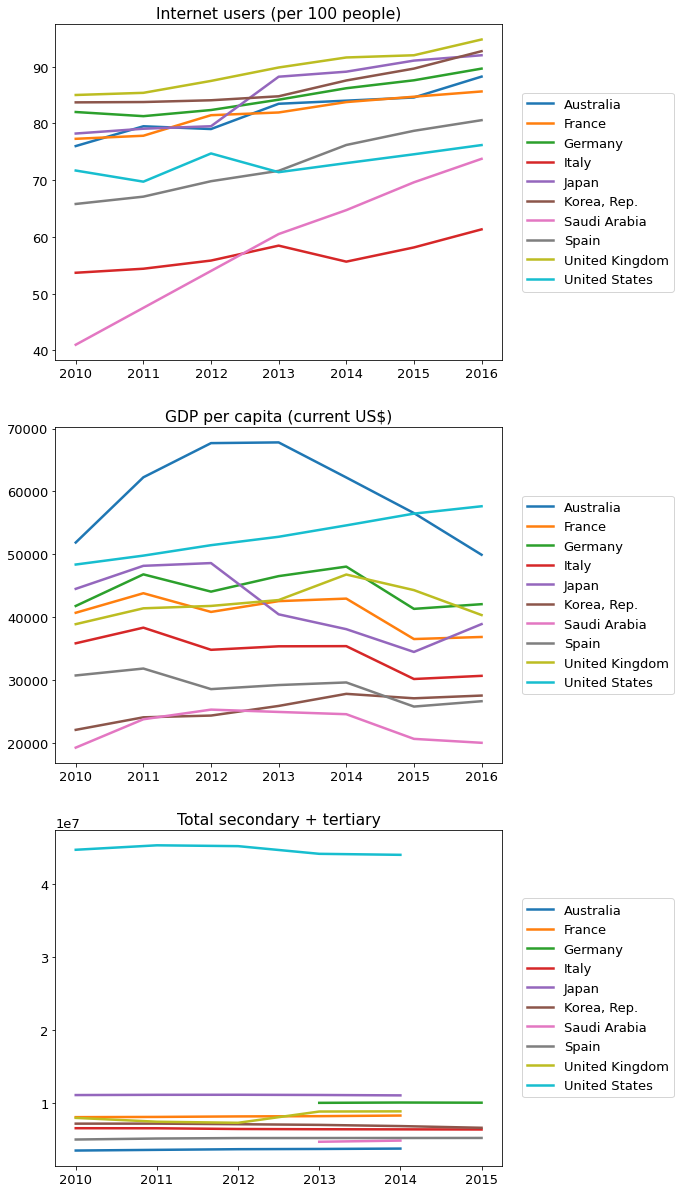

In [80]:
fig, axes = plt.subplots(3,1, figsize=(8,21))

x_year = df_time.index

for i, value in enumerate(['Internet users (per 100 people)', 'GDP per capita (current US$)', 'Total secondary + tertiary']):
    y = df_time.loc[:, (pays_selec,value)]
    ax = axes[i]
    ax.plot(x_year,y, linewidth=2.5)
    ax.set_title(value)
    lab = y.columns.get_level_values(0)
    ax.legend(lab, loc="center right", bbox_to_anchor=(1.4, 0.5))
    


**Accès internet:** Sans surprise, la tendance est à la hausse pour tous les pays. On note que l'Italie se détache par un léger retard dans le développement de son réseau.

**PIB par habitant:** On voit que la tendance du PIB par habitant est globalement à la baisse pour les pays sélectionnés sur les années 2013 à 2016, sauf pour les Etats-Unis et la Corée du Sud qui semblent connaître une augmentation.

**Total d'étudiants inscrits dans le secondaire et le tertiaire:** Cet indicateur semble évoluer beaucoup plus lentement que les autres. Les Etats-Unis ont de loin le potentiel de clients le plus élevé, c'est donc un pays à cibler en priorité. 

Le jeu de données contient également des données prospectives pour les années 2020 à 2100, qui peuvent nous renseigner sur l'évolution de la proportion d'étudiants dans les années à venir:

In [81]:
pays_selec =['United States', 'Japan', 'Germany', 'United Kingdom', 'France',
       'Korea, Rep.', 'Italy', 'Spain', 'Saudi Arabia', 'Australia']
projection = ['Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Lower Secondary. Total',
              'Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total']
df_proj = EdData[["Country Name", "Indicator Name", '2020','2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']]
df_proj = df_proj[df_proj["Country Name"].isin(pays_selec)]
df_proj = df_proj[df_proj["Indicator Name"].isin(projection)]
df_time2 = df_proj.set_index(["Country Name", "Indicator Name"]).transpose()

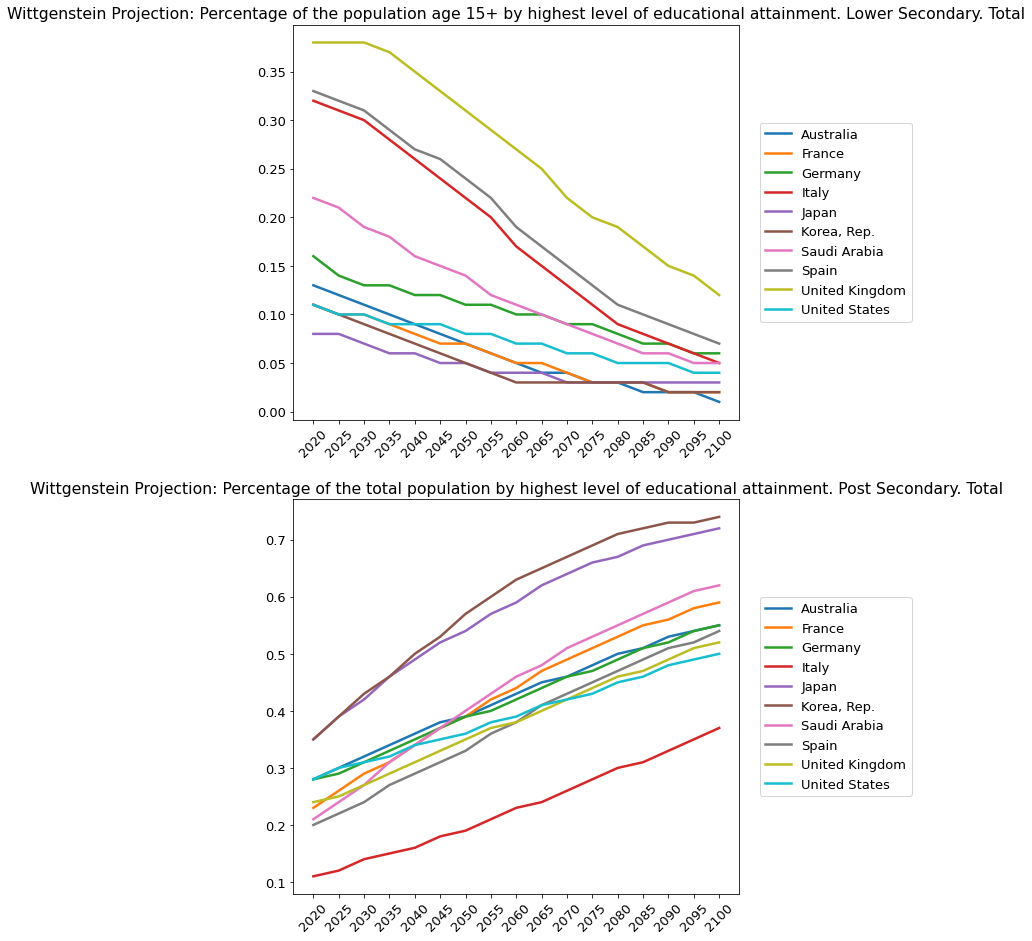

In [83]:
fig, axes = plt.subplots(2,1, figsize=(8,16))

x_year = df_time2.index

for i, value in enumerate(projection):
    y = df_time2.loc[:, (pays_selec,value)]
    ax = axes[i]
    ax.plot(x_year,y, linewidth=2.5)
    ax.set_title(value)
    lab = y.columns.get_level_values(0)
    ax.legend(lab, loc="center right", bbox_to_anchor=(1.4, 0.5))
    ax.tick_params(axis='x', labelrotation=45)

Les données prospectives permettent d'avoir une idée de l'évolution du nombre d'étudiants dans les années à venir. Sur le premier graphe on voit que la proportion de la population de plus de 15 ans qui arrête les études au bas secondaire diminue.
Sur le deuxième graphe on voit que la proportion de la population qui a complété le secondaire augmente, et ce pour tous les pays.
Ces deux graphiques montrent que pour les pays sélectionnés la population fera en moyenne de plus longues études.


## Conlusion

En se basant sur ces 3 critères (potentiel d'étudiants dans le secondaire et le tertiaire, accès à internet, PIB par habitant), les pays cités ci-dessus sont les plus favorables à un développement commercial. Parmi eux  on y retrouve principalement des pays d'Europe mais également les Etats-Unis dont le fort potentiel d'étudiants en fait une cible privilégiée, le Japon, la Corée du Sud et l'Arabie Saoudite.

Pour aller plus loin, on pourrait utiliser un algorithme de scoring pour assigner un score d'attractivité à chaque pays.